In [1]:
import pandas as pd
import numpy as np
import joblib
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM

2025-07-02 16:06:08.135732: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 16:06:08.142445: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-02 16:06:08.152855: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751468768.170504  285324 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751468768.176126  285324 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751468768.197607  285324 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
X_train = joblib.load('../../preprocessed_data/CICIDS/X_train.joblib')
X_test = joblib.load('../../preprocessed_data/CICIDS/X_test.joblib')
Y_train = joblib.load('../../preprocessed_data/CICIDS/Y_train.joblib')
Y_test = joblib.load('../../preprocessed_data/CICIDS/Y_test.joblib')

### CNN training

In [3]:
CNN_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2), # keep the maximum each 2 values (divide by 2 the number of values)
    Dropout(0.3), # disable 30% of neurons => reduce overfitting
    Flatten(), # transform the structure from 3D to 2D
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # binary output (0=normal or 1=attack)
])

CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

CNN_model.summary()

history = CNN_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))

2025-07-02 16:06:11.705196: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 67, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 33, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 33, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1056)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        67,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,841 (265.00 KB)

 Trainable params: 67,841 (265.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-07-02 16:06:12.168215: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 215474304 exceeds 10% of free system memory.


12197/12199 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9017 - loss: 0.2233

2025-07-02 16:06:41.033838: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 92346288 exceeds 10% of free system memory.


12199/12199 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9017 - loss: 0.2233 - val_accuracy: 0.9432 - val_loss: 0.1333
Epoch 2/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9421 - loss: 0.1441 - val_accuracy: 0.9602 - val_loss: 0.1114
Epoch 3/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9504 - loss: 0.1290 - val_accuracy: 0.9638 - val_loss: 0.0988
Epoch 4/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9558 - loss: 0.1180 - val_accuracy: 0.9669 - val_loss: 0.0981
Epoch 5/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9597 - loss: 0.1106 - val_accuracy: 0.9682 - val_loss: 0.0890


### LSTM training

In [4]:
LSTM_model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

LSTM_model.summary()


history = LSTM_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,121 (82.50 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-07-02 16:08:57.656053: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 215474304 exceeds 10% of free system memory.


12198/12199 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8524 - loss: 0.3155

2025-07-02 16:12:13.755038: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 92346288 exceeds 10% of free system memory.


12199/12199 ━━━━━━━━━━━━━━━━━━━━ 228s 19ms/step - accuracy: 0.8524 - loss: 0.3155 - val_accuracy: 0.9151 - val_loss: 0.1950
Epoch 2/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 228s 19ms/step - accuracy: 0.9200 - loss: 0.1915 - val_accuracy: 0.9334 - val_loss: 0.1606
Epoch 3/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 231s 19ms/step - accuracy: 0.9288 - loss: 0.1692 - val_accuracy: 0.9359 - val_loss: 0.1501
Epoch 4/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 230s 19ms/step - accuracy: 0.9411 - loss: 0.1440 - val_accuracy: 0.9442 - val_loss: 0.1283
Epoch 5/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 232s 19ms/step - accuracy: 0.9518 - loss: 0.1249 - val_accuracy: 0.9638 - val_loss: 0.1065


### AE-LSTM

In [5]:
input_dim = X_train.shape[1]  # n_features

# encoder
inputs = Input(shape=(input_dim, 1))
encoded = LSTM(64, return_sequences=False)(inputs)
encoded = Dense(32, activation='relu')(encoded)

# classifier
x = Dropout(0.3)(encoded)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

AE_LSTM_model = Model(inputs, output)

AE_LSTM_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
AE_LSTM_model.summary()

history = AE_LSTM_model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 69, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,153 (82.63 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


2025-07-02 16:28:07.573174: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 215474304 exceeds 10% of free system memory.


12199/12199 ━━━━━━━━━━━━━━━━━━━━ 229s 19ms/step - accuracy: 0.8584 - loss: 0.3062 - val_accuracy: 0.9087 - val_loss: 0.2095
Epoch 2/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 230s 19ms/step - accuracy: 0.9240 - loss: 0.1844 - val_accuracy: 0.9333 - val_loss: 0.1636
Epoch 3/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 229s 19ms/step - accuracy: 0.9354 - loss: 0.1576 - val_accuracy: 0.9419 - val_loss: 0.1558
Epoch 4/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 230s 19ms/step - accuracy: 0.9479 - loss: 0.1332 - val_accuracy: 0.9500 - val_loss: 0.1287
Epoch 5/5
12199/12199 ━━━━━━━━━━━━━━━━━━━━ 229s 19ms/step - accuracy: 0.9594 - loss: 0.1128 - val_accuracy: 0.9527 - val_loss: 0.1163


In [6]:
CNN_model.save("../../models/cnn_CICIDS2017_model.keras")
LSTM_model.save("../../models/lstm_CICIDS2017_model.keras")
AE_LSTM_model.save("../../models/ae-lstm_CICIDS2017_model.keras")

In [7]:
file_name_cnn = '../../models/cnn_CICIDS2017.pkl' 
joblib.dump(CNN_model, file_name_cnn) 

file_name_lstm = '../../models/lstm_CICIDS2017.pkl' 
joblib.dump(LSTM_model, file_name_lstm) 

file_name_ae_lstm = '../../models/ae-lstm_CICIDS2017.pkl' 
joblib.dump(AE_LSTM_model, file_name_ae_lstm)

['../../models/ae-lstm_CICIDS2017.pkl']

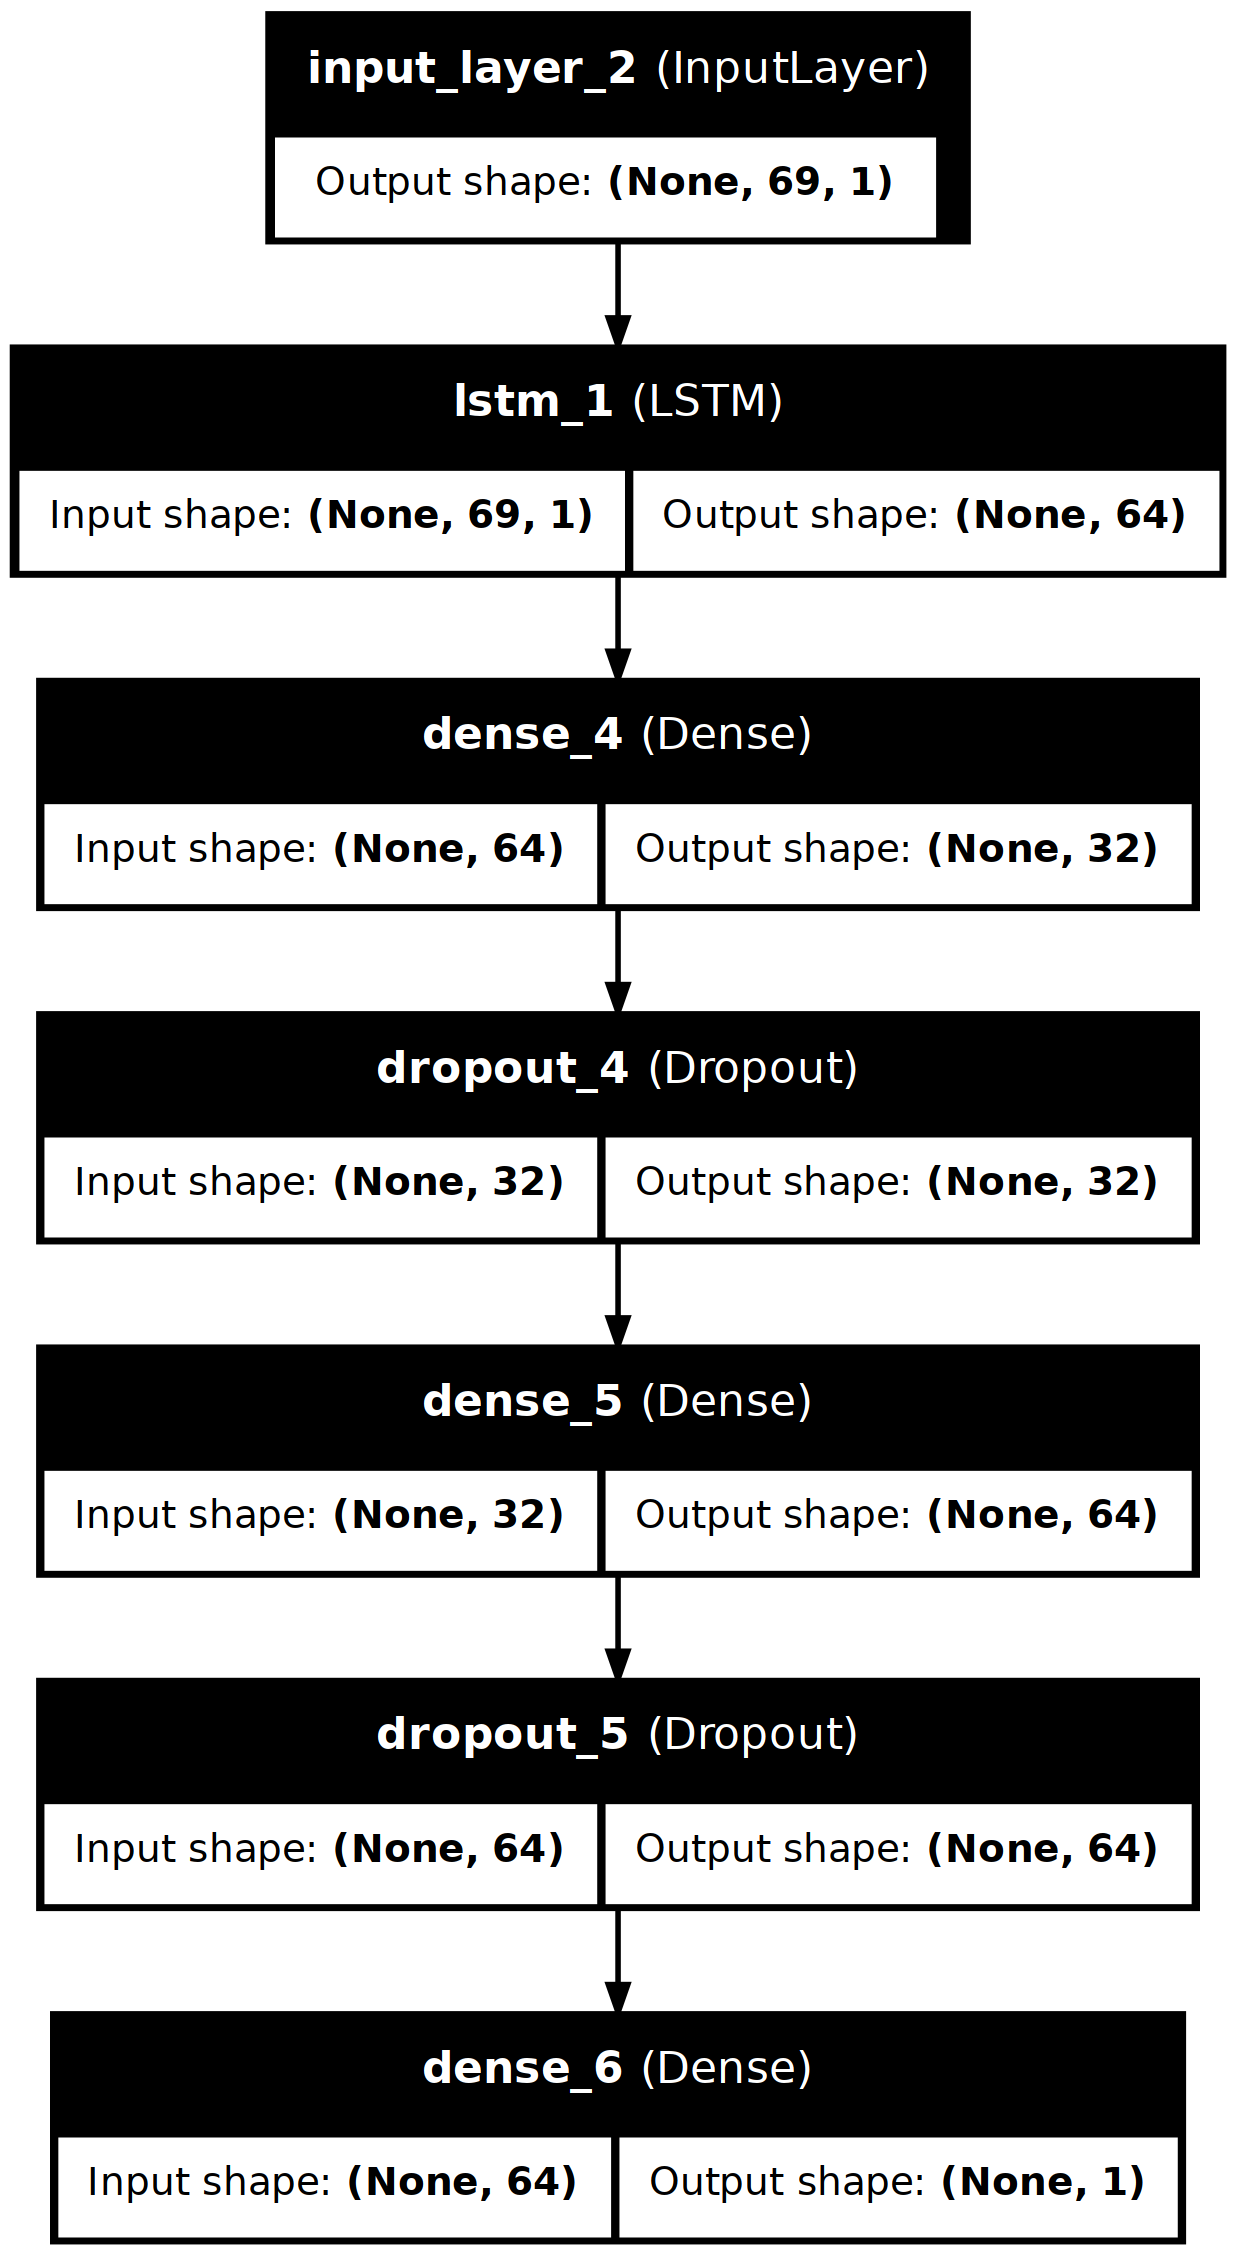

In [ ]:
from tensorflow.keras.utils import plot_model

from keras.models import load_model

cnn_loaded = load_model('../../models/cnn_CICIDS2017_model.keras')
lstm_loaded = load_model('../../models/lstm_CICIDS2017_model.keras')
ae_lstm_loaded = load_model('../../models/ae-lstm_CICIDS2017_model.keras')

plot_model(cnn_loaded, to_file='../../results/CICIDS/models/CNN_model.png', show_shapes=True, show_layer_names=True)
plot_model(lstm_loaded, to_file='../../results/CICIDS/models/LSTM_model.png', show_shapes=True, show_layer_names=True)
plot_model(ae_lstm_loaded, to_file='../../results/CICIDS/models/AE-LSTM_model.png', show_shapes=True, show_layer_names=True)

### CNN metrics

10456/10456 ━━━━━━━━━━━━━━━━━━━━ 6s 559us/step
              precision    recall  f1-score   support

      Normal       0.99      0.95      0.97    167294
     Attacks       0.95      0.99      0.97    167294

    accuracy                           0.97    334588
   macro avg       0.97      0.97      0.97    334588
weighted avg       0.97      0.97      0.97    334588

Test Loss: 0.0890
Test Accuracy: 0.9682


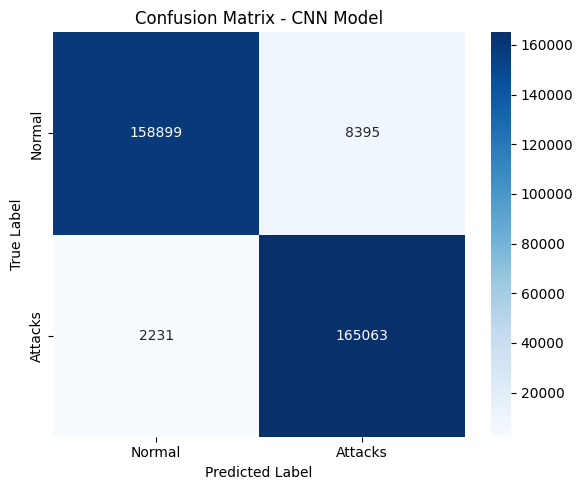

Attacks detected (True Positive) : 165063
Normal traffic detected (True Negative) : 158899
Attacks missed (False Negative) : 2231
False alarms (False Positive) : 8395


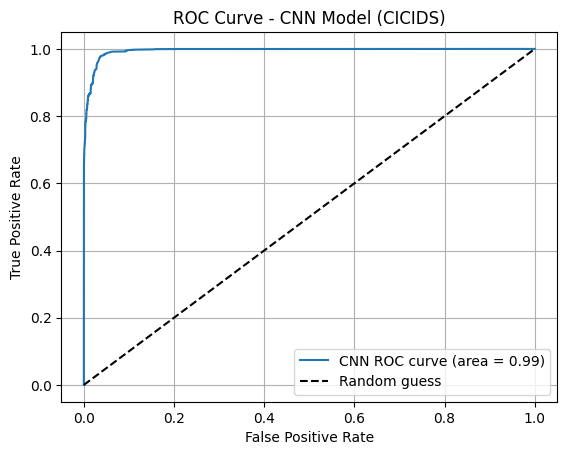

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = CNN_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = CNN_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - CNN Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/models/CNN_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'CNN ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/models/CNN_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### LSTM metrics

10456/10456 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step
              precision    recall  f1-score   support

      Normal       0.98      0.95      0.96    167294
     Attacks       0.95      0.98      0.96    167294

    accuracy                           0.96    334588
   macro avg       0.96      0.96      0.96    334588
weighted avg       0.96      0.96      0.96    334588

Test Loss: 0.1065
Test Accuracy: 0.9638


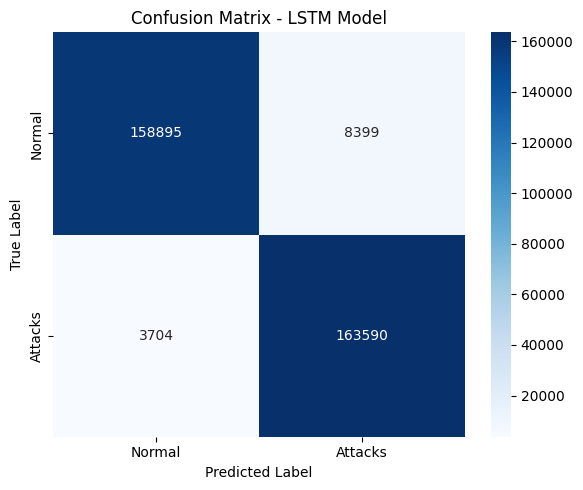

Attacks detected (True Positive) : 163590
Normal traffic detected (True Negative) : 158895
Attacks missed (False Negative) : 3704
False alarms (False Positive) : 8399


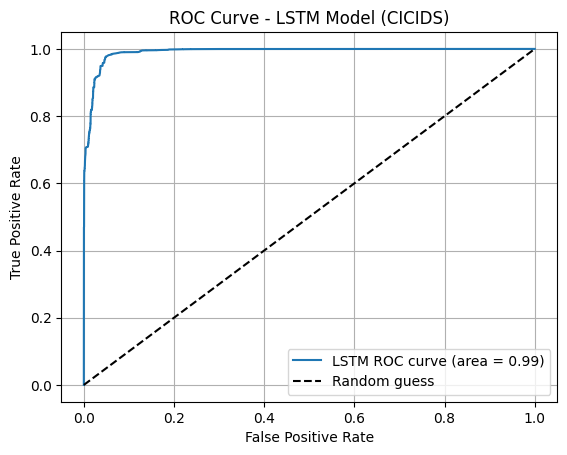

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = LSTM_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = LSTM_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LSTM Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/models/LSTM_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'LSTM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/models/LSTM_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()


### AE-LSTM metrics

10456/10456 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step
              precision    recall  f1-score   support

      Normal       0.98      0.92      0.95    167294
     Attacks       0.93      0.98      0.95    167294

    accuracy                           0.95    334588
   macro avg       0.95      0.95      0.95    334588
weighted avg       0.95      0.95      0.95    334588

Test Loss: 0.1163
Test Accuracy: 0.9527


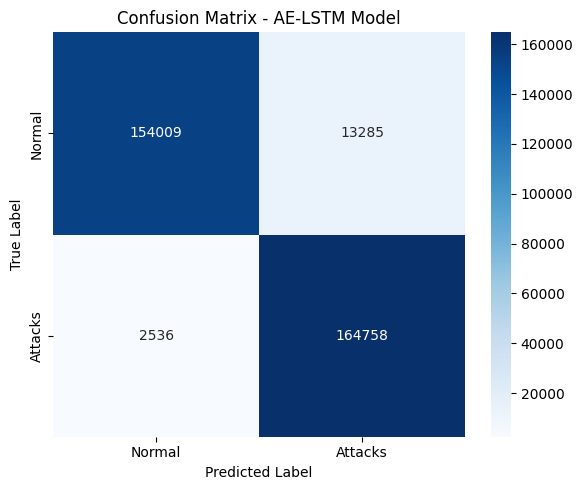

Attacks detected (True Positive) : 164758
Normal traffic detected (True Negative) : 154009
Attacks missed (False Negative) : 2536
False alarms (False Positive) : 13285


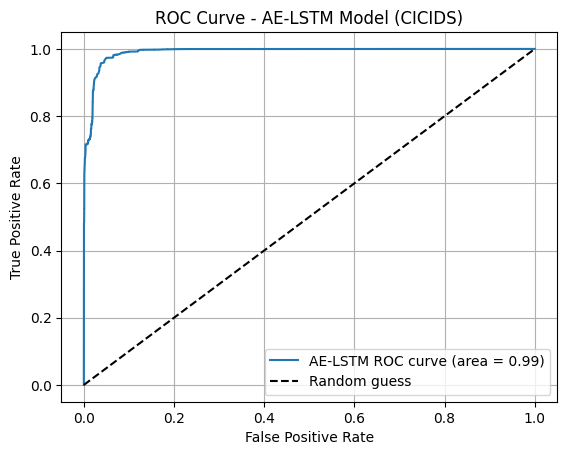

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = AE_LSTM_model.predict(X_test)


y_pred = (y_pred_prob > 0.5).astype("int32")

# (precision, recall, F1-score)
print(classification_report(Y_test, y_pred, labels=[0,1], target_names=["Normal", "Attacks"]))

# Accuracy and loss
loss, accuracy = AE_LSTM_model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# confusion Matrix
cm = confusion_matrix(Y_test, y_pred, labels=[0,1],)
labels = ["Normal", "Attacks"]
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - AE-LSTM Model')
plt.tight_layout()
plt.savefig("../../results/CICIDS/models/AE-LSTM_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# displaying the attack number
tn, fp, fn, tp = cm.ravel()
print(f"Attacks detected (True Positive) : {tp}")
print(f"Normal traffic detected (True Negative) : {tn}")
print(f"Attacks missed (False Negative) : {fn}")
print(f"False alarms (False Positive) : {fp}")

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AE-LSTM ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AE-LSTM Model (CICIDS)')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("../../results/CICIDS/models/AE-LSTM_ROC_curve.png", dpi=300, bbox_inches='tight')
plt.show()
plt.close()
